In [16]:
import numpy as np
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.firing_rates as firing
import spikeAnalysisToolsV2.helper as helper
import spikeAnalysisToolsV2.overviews as overview
import spikeAnalysisToolsV2.combine_stimuli as combine
import spikeAnalysisToolsV2.plotting as spikeplot
import spikeAnalysisToolsV2.information_scores as info

In [17]:
masterpath = "/Users/clemens/Documents/Code/ModelClemens/output"
## set the subfolder to the Simulation you want to analyse 

subfolders = [
    "01_10-17_28_rounded_long_test_no_CT_e285"
#     "12_27-17_24_test_testing_stim"
            ]


extensions =  ["initial"] #+ ["trained_e285", "trained_e300"]#, "testing/epoch95"]

# info_neurons is just an array of the information from above. This makes it easier to run the functions and pass the information. 
# info_times same for times
network_architecture = dict(
    num_exc_neurons_per_layer = 64*64,
    num_inh_neurons_per_layer = 32*32,
    num_layers = 4,
    #total_per_layer = num_exc_neurons_per_layer + num_inh_neurons_per_layer,
    #total_network = total_per_layer * num_layers,
    #num_stimuli = 16
)


stimuli_names = data.load_testing_stimuli_names(masterpath+"/" + subfolders[0])
print(stimuli_names)

info_times = dict(
    length_of_stimulus = 2.0,
    num_stimuli = len(stimuli_names),
    time_start = 1.5,
    time_end = 1.9
)

n_neurons_to_plot = 500


['obj0:1wcl', 'obj0:1bcl', 'obj0:1wdl', 'obj0:1bdl', 'obj0:2wcl', 'obj0:2bcl', 'obj0:2wdl', 'obj0:2bdl', 'obj0:1wcr', 'obj0:1bcr', 'obj0:1wdr', 'obj0:1bdr', 'obj0:2wcr', 'obj0:2bcr', 'obj0:2wdr', 'obj0:2bdr', 'obj1:1wcl', 'obj1:1bcl', 'obj1:1wdl', 'obj1:1bdl', 'obj1:2wcl', 'obj1:2bcl', 'obj1:2wdl', 'obj1:2bdl', 'obj1:1wcr', 'obj1:1bcr', 'obj1:1wdr', 'obj1:1bdr', 'obj1:2wcr', 'obj1:2bcr', 'obj1:2wdr', 'obj1:2bdr', 'obj2:1wcl', 'obj2:1bcl', 'obj2:1wdl', 'obj2:1bdl', 'obj2:2wcl', 'obj2:2bcl', 'obj2:2wdl', 'obj2:2bdl', 'obj2:1wcr', 'obj2:1bcr', 'obj2:1wdr', 'obj2:1bdr', 'obj2:2wcr', 'obj2:2bcr', 'obj2:2wdr', 'obj2:2bdr', 'obj3:1wcl', 'obj3:1bcl', 'obj3:1wdl', 'obj3:1bdl', 'obj3:2wcl', 'obj3:2bcl', 'obj3:2wdl', 'obj3:2bdl', 'obj3:1wcr', 'obj3:1bcr', 'obj3:1wdr', 'obj3:1bdr', 'obj3:2wcr', 'obj3:2bcr', 'obj3:2wdr', 'obj3:2bdr', 'obj4:1wcl', 'obj4:1bcl', 'obj4:1wdl', 'obj4:1bdl', 'obj4:2wcl', 'obj4:2bcl', 'obj4:2wdl', 'obj4:2bdl', 'obj4:1wcr', 'obj4:1bcr', 'obj4:1wdr', 'obj4:1bdr', 'obj4:2wcr'

In [18]:
spikes = data.load_spikes_from_subfolders(masterpath, subfolders, extensions, False)

rates_subfolders = firing.calculate_rates_subfolder(
    spikes,
    network_architecture, 
    info_times)
spikes = None

Start


# V4 like shape cells
I.e. Cells that respond to objects differently depending on wether they are left of loc1/loc2 or right of it. 
**Independent** of color (black or white), shape (circle or diamond), or location (loc1 or loc2)

In [19]:
object_list_shape = data.load_testing_stimuli_indices_from_wildcarts(masterpath+"/" + subfolders[0], ["***r", "***l"])
object_indices_shape = [o['indices'] for o in object_list_shape]
print(object_indices_shape)

[[8, 9, 10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42, 43, 44, 45, 46, 47, 56, 57, 58, 59, 60, 61, 62, 63, 72, 73, 74, 75, 76, 77, 78, 79, 88, 89, 90, 91, 92, 93, 94, 95, 104, 105, 106, 107, 108, 109, 110, 111, 120, 121, 122, 123, 124, 125, 126, 127, 136, 137, 138, 139, 140, 141, 142, 143, 152, 153, 154, 155, 156, 157, 158, 159, 168, 169, 170, 171, 172, 173, 174, 175], [0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23, 32, 33, 34, 35, 36, 37, 38, 39, 48, 49, 50, 51, 52, 53, 54, 55, 64, 65, 66, 67, 68, 69, 70, 71, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 112, 113, 114, 115, 116, 117, 118, 119, 128, 129, 130, 131, 132, 133, 134, 135, 144, 145, 146, 147, 148, 149, 150, 151, 160, 161, 162, 163, 164, 165, 166, 167]]


/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: invalid value encountered in true_divide
  inh_info = single_cell_information(inh_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:209: RuntimeWarning: divide by zero encountered in log2
  inh_info = single_cell_information(inh_table)


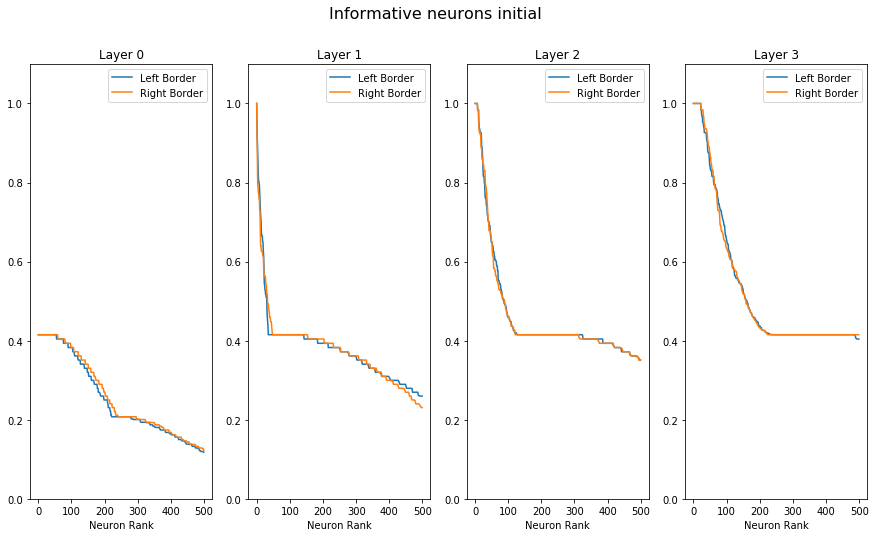

In [20]:
for i, name in enumerate(extensions):
    exh_shape_info, inh_shape_info = info.firing_rates_to_single_cell_information(rates_subfolders[0][i], object_indices_shape, n_bins=3, calc_inhibitory=True)
    spikeplot.plot_ranked_neurons(exh_shape_info, "Informative neurons {}".format(name), n_neurons_to_plot, ["Left Border", "Right Border"], vmax=1)

#exh_shape_info_after, inh_shape_info_after = info.firing_rates_to_single_cell_information(rates_subfolders[0][1], object_indices_shape, n_bins=3, calc_inhibitory=True)
#spikeplot.plot_ranked_neurons(exh_shape_info_after, "Informative neurons after training", n_neurons_to_plot, ["Left Border", "Right Border"], vmax=1)

## Cells with information about random label
Each stimulus is now randomly assigned to object 0 or object 1. But it will always be asigned to the same object when it is presented repeatedly

In [21]:
object_indices_random = data.random_label_from_testing_list(masterpath+"/" + subfolders[0], 2)
print(object_indices_random)

[[3, 19, 35, 51, 67, 83, 99, 115, 131, 147, 163, 7, 23, 39, 55, 71, 87, 103, 119, 135, 151, 167, 15, 31, 47, 63, 79, 95, 111, 127, 143, 159, 175, 4, 20, 36, 52, 68, 84, 100, 116, 132, 148, 164, 0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 14, 30, 46, 62, 78, 94, 110, 126, 142, 158, 174, 6, 22, 38, 54, 70, 86, 102, 118, 134, 150, 166, 10, 26, 42, 58, 74, 90, 106, 122, 138, 154, 170], [11, 27, 43, 59, 75, 91, 107, 123, 139, 155, 171, 13, 29, 45, 61, 77, 93, 109, 125, 141, 157, 173, 5, 21, 37, 53, 69, 85, 101, 117, 133, 149, 165, 9, 25, 41, 57, 73, 89, 105, 121, 137, 153, 169, 2, 18, 34, 50, 66, 82, 98, 114, 130, 146, 162, 1, 17, 33, 49, 65, 81, 97, 113, 129, 145, 161, 12, 28, 44, 60, 76, 92, 108, 124, 140, 156, 172, 8, 24, 40, 56, 72, 88, 104, 120, 136, 152, 168]]


/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)


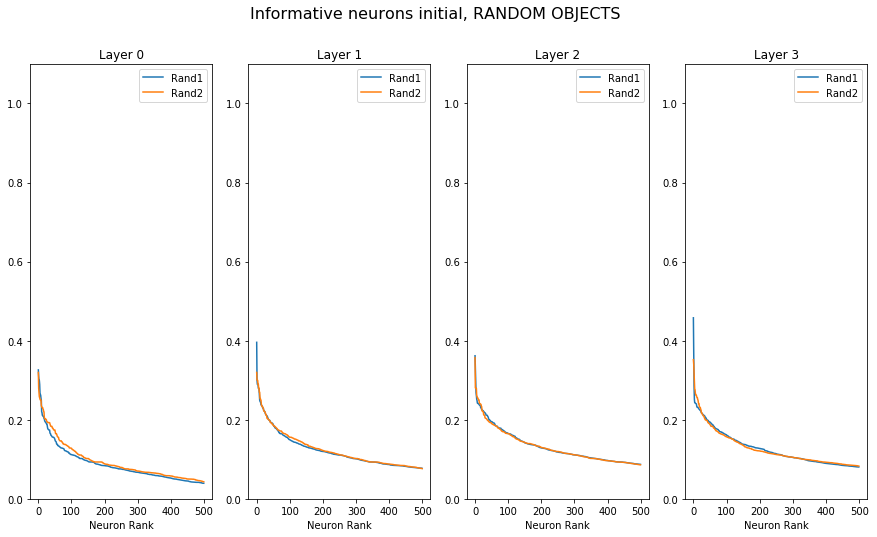

In [22]:
for i, name in enumerate(extensions):
    exh_shape_info_rand, _in = info.firing_rates_to_single_cell_information(rates_subfolders[0][i], object_indices_random, n_bins=3, calc_inhibitory=False)
    spikeplot.plot_ranked_neurons(exh_shape_info_rand, "Informative neurons {}, RANDOM OBJECTS".format(name), n_neurons_to_plot, ["Rand1", "Rand2"], vmax=1)

#exh_shape_info_after_rand, _in = info.firing_rates_to_single_cell_information(rates_subfolders[0][1], object_indices_random, n_bins=3, calc_inhibitory=False)
#spikeplot.plot_ranked_neurons(exh_shape_info_after_rand, "Informative neurons after training, RANDOM OBJECTS", n_neurons_to_plot, ["Rand1", "Rand2"], vmax=1)

## Cells with information about location invariance not through trace learning

In [23]:
object_list_quadrants = data.load_testing_stimuli_indices_from_wildcarts(masterpath+"/" + subfolders[0], ["1**l", "1**r", "2**l", "2**r"])

object_indices_quadrants = [o['indices'] for o in object_list_quadrants]
indices_1l_2r = object_indices_quadrants[0] + object_indices_quadrants[3]
indices_1r_2l = object_indices_quadrants[1] + object_indices_quadrants[2]
object_indices_wrong_shape_outer = [indices_1l_2r, indices_1r_2l]
object_indices_wrong_shape_1vs2 = [
    object_indices_quadrants[0] + object_indices_quadrants[1],
    object_indices_quadrants[2] + object_indices_quadrants[3],
]
print(object_indices_wrong_shape_outer)
print(object_indices_wrong_shape_1vs2)

[[0, 1, 2, 3, 16, 17, 18, 19, 32, 33, 34, 35, 48, 49, 50, 51, 64, 65, 66, 67, 80, 81, 82, 83, 96, 97, 98, 99, 112, 113, 114, 115, 128, 129, 130, 131, 144, 145, 146, 147, 160, 161, 162, 163, 12, 13, 14, 15, 28, 29, 30, 31, 44, 45, 46, 47, 60, 61, 62, 63, 76, 77, 78, 79, 92, 93, 94, 95, 108, 109, 110, 111, 124, 125, 126, 127, 140, 141, 142, 143, 156, 157, 158, 159, 172, 173, 174, 175], [8, 9, 10, 11, 24, 25, 26, 27, 40, 41, 42, 43, 56, 57, 58, 59, 72, 73, 74, 75, 88, 89, 90, 91, 104, 105, 106, 107, 120, 121, 122, 123, 136, 137, 138, 139, 152, 153, 154, 155, 168, 169, 170, 171, 4, 5, 6, 7, 20, 21, 22, 23, 36, 37, 38, 39, 52, 53, 54, 55, 68, 69, 70, 71, 84, 85, 86, 87, 100, 101, 102, 103, 116, 117, 118, 119, 132, 133, 134, 135, 148, 149, 150, 151, 164, 165, 166, 167]]
[[0, 1, 2, 3, 16, 17, 18, 19, 32, 33, 34, 35, 48, 49, 50, 51, 64, 65, 66, 67, 80, 81, 82, 83, 96, 97, 98, 99, 112, 113, 114, 115, 128, 129, 130, 131, 144, 145, 146, 147, 160, 161, 162, 163, 8, 9, 10, 11, 24, 25, 26, 27, 40, 4

/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)


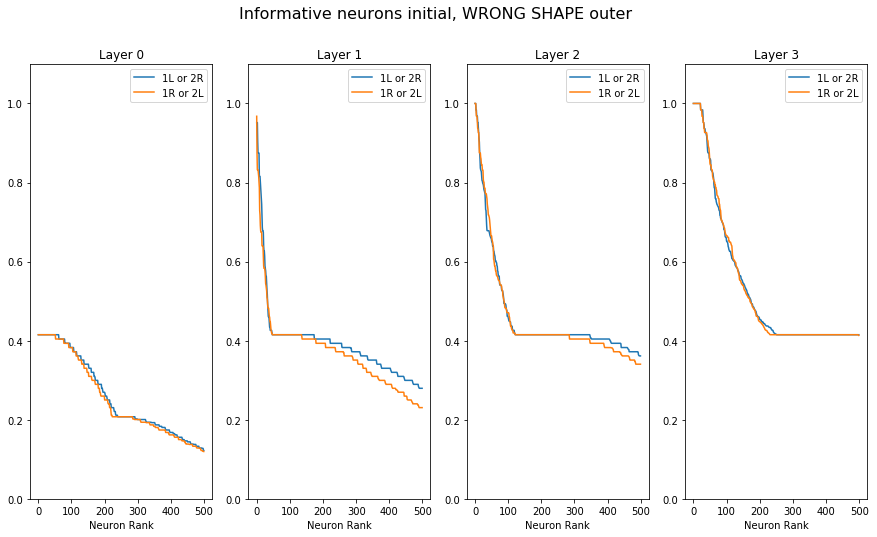

In [24]:
for i, name in enumerate(extensions):
    exh_info_wrong_shape_outer, _in = info.firing_rates_to_single_cell_information(rates_subfolders[0][i], object_indices_wrong_shape_outer, n_bins=3, calc_inhibitory=False)
    spikeplot.plot_ranked_neurons(exh_info_wrong_shape_outer, "Informative neurons {}, WRONG SHAPE outer".format(name), n_neurons_to_plot, ["1L or 2R", "1R or 2L"], vmax=1)


/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: invalid value encountered in true_divide
  exc_info = single_cell_information(exc_table)
/Users/clemens/Documents/Code/AnalysisToolbox/spikeAnalysisToolsV2/information_scores.py:205: RuntimeWarning: divide by zero encountered in log2
  exc_info = single_cell_information(exc_table)


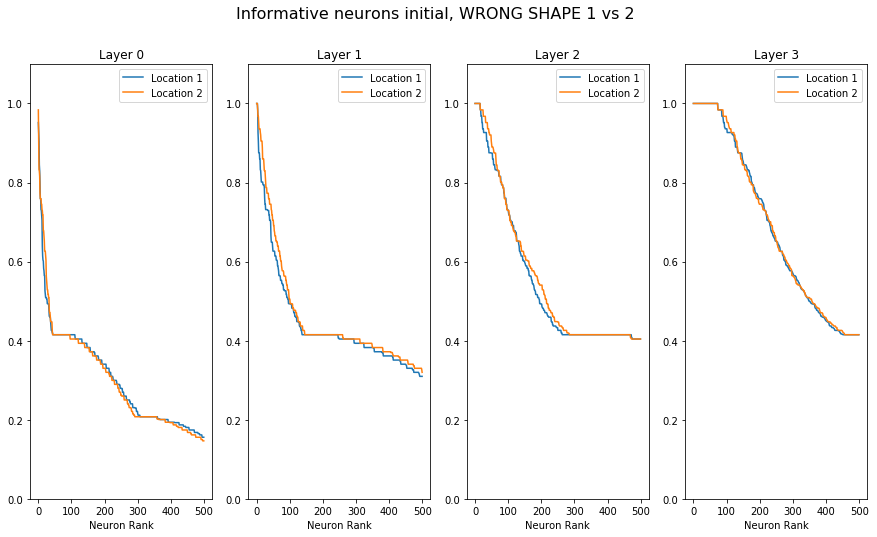

In [25]:
for i, name in enumerate(extensions):
    exh_info_wrong_shape_1vs2, _in = info.firing_rates_to_single_cell_information(rates_subfolders[0][i], object_indices_wrong_shape_1vs2, n_bins=3, calc_inhibitory=False)
    spikeplot.plot_ranked_neurons(exh_info_wrong_shape_1vs2, "Informative neurons {}, WRONG SHAPE 1 vs 2".format(name), n_neurons_to_plot, ["Location 1", "Location 2"], vmax=1)